In [111]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from statsmodels.tsa.api import Holt
from sklearn.preprocessing import StandardScaler

In [8]:
covid=pd.read_csv('covid_19_data.csv')

In [10]:
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
18322,18323,04/24/2020,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18323,18324,04/24/2020,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18324,18325,04/24/2020,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0
18325,18326,04/24/2020,Yunnan,Mainland China,2020-04-25 06:31:19,185.0,2.0,180.0
18326,18327,04/24/2020,Zhejiang,Mainland China,2020-04-25 06:31:19,1268.0,1.0,1256.0


In [11]:
covid.describe()

,SNo,Confirmed,Deaths,Recovered
count,18327.000000,18327.000000,18327.000000,18327.000000
mean,9164.000000,3030.015551,180.680417,764.542424
std,5290.693527,15129.079515,1362.099905,5618.658958
min,1.000000,0.000000,0.000000,0.000000
25%,4582.500000,9.000000,0.000000,0.000000
50%,9164.000000,101.000000,1.000000,2.000000
75%,13745.500000,674.500000,8.000000,71.000000
max,18327.000000,271590.000000,25969.000000,109800.000000


In [13]:
covid.shape

(18327, 8)

In [23]:
covid[covid['Province/State'].isnull()==True]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
35,36,01/22/2020,NaN,Japan,1/22/2020 17:00,2.0,0.0,0.0
36,37,01/22/2020,NaN,Thailand,1/22/2020 17:00,2.0,0.0,0.0
37,38,01/22/2020,NaN,South Korea,1/22/2020 17:00,1.0,0.0,0.0
73,74,01/23/2020,NaN,Japan,1/23/20 17:00,1.0,0.0,0.0
74,75,01/23/2020,NaN,Thailand,1/23/20 17:00,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...
18184,18185,04/24/2020,NaN,West Bank and Gaza,2020-04-25 06:31:19,484.0,4.0,92.0
18185,18186,04/24/2020,NaN,Western Sahara,2020-04-25 06:31:19,6.0,0.0,5.0
18186,18187,04/24/2020,NaN,Yemen,2020-04-25 06:31:19,1.0,0.0,1.0
18187,18188,04/24/2020,NaN,Zambia,2020-04-25 06:31:19,84.0,3.0,37.0


In [25]:
covid.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [29]:
covid.drop(['SNo'],axis=1,inplace=True)

In [30]:
covid.head(2)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0


In [31]:
covid['ObservationDate']=pd.to_datetime(covid['ObservationDate'])

In [49]:
datewise=covid.groupby(['ObservationDate']).agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})
datewise

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0
...,...,...,...
2020-04-20,2472259.0,645738.0,169986.0
2020-04-21,2549123.0,679819.0,176583.0
2020-04-22,2623960.0,709694.0,183066.0


In [54]:
print("Covid Information:\n")
print("Total number of Confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of Death cases around the world",datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the world",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed cases around the world",(datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))


Covid Information:

Total number of Confirmed cases around the world 2811193.0
Total number of Recovered cases around the world 793601.0
Total number of Death cases around the world 197159.0
Total number of Active cases around the world 1820433.0
Total number of Closed cases around the world 990760.0


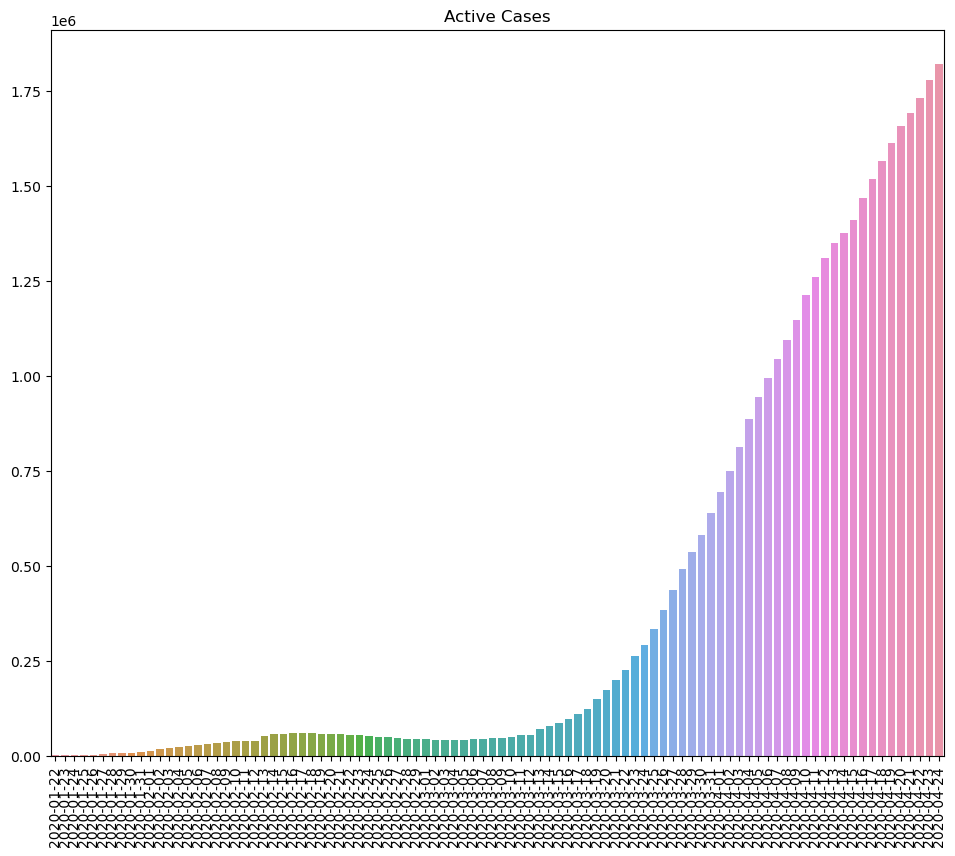

In [63]:
plt.figure(figsize=(10,8))
plt.title("Active Cases")
sns.barplot(x=datewise.index.date,y=(datewise['Confirmed']-datewise['Recovered']-datewise['Deaths']))
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.show()

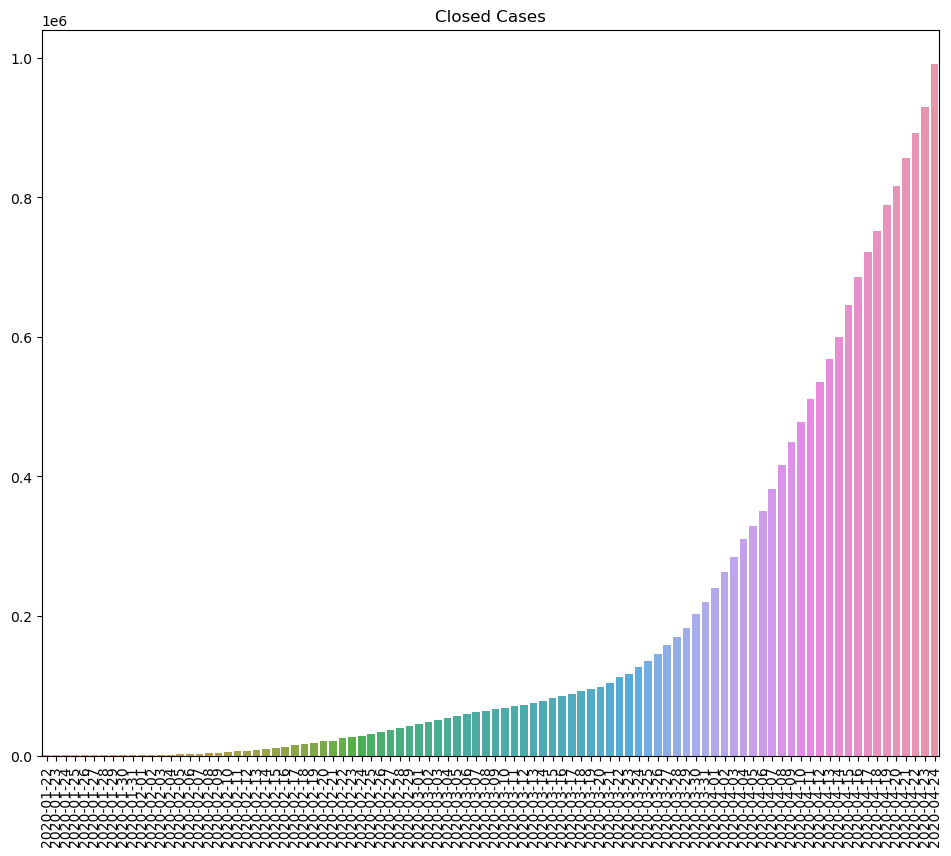

In [69]:
plt.figure(figsize=(10,8))
plt.title("Closed Cases")
sns.barplot(x=datewise.index.date,y=(datewise['Recovered']+datewise['Deaths']))
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.show()

/var/folders/mg/rcr7nks14gv8j_rmk8qrv37c0000gn/T/ipykernel_12462/2038382214.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  datewise['WeekOfYear']=datewise.index.weekofyear


Text(0.5, 1.0, 'Weekly Progress')

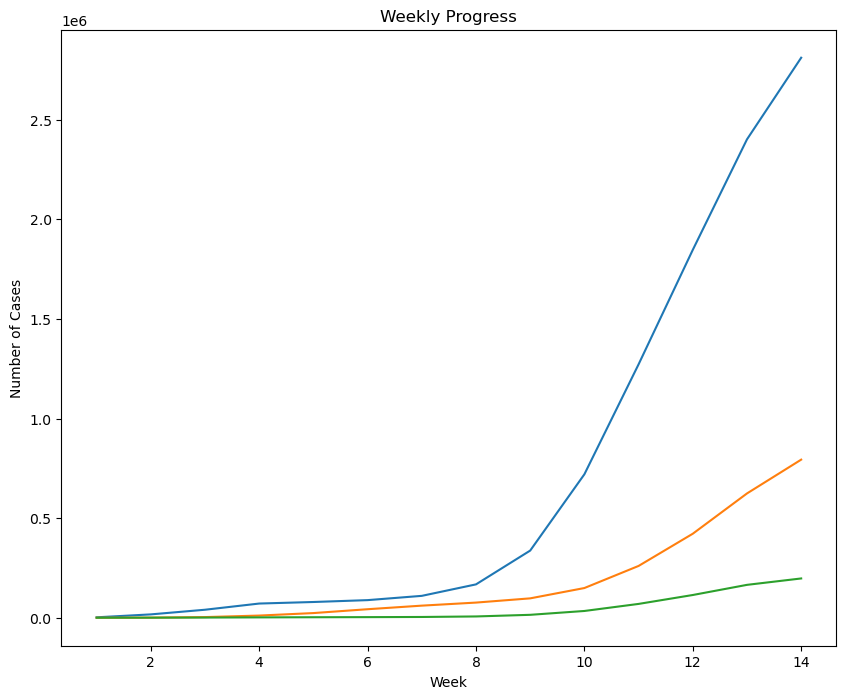

In [77]:
datewise['WeekOfYear']=datewise.index.weekofyear
week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise['WeekOfYear'].unique()):
    weekwise_confirmed.append(datewise[datewise['WeekOfYear']==i]['Confirmed'].iloc[-1])
    weekwise_recovered.append(datewise[datewise['WeekOfYear']==i]['Recovered'].iloc[-1])
    weekwise_deaths.append(datewise[datewise['WeekOfYear']==i]['Deaths'].iloc[-1])
    week_num.append(w)
    w+=1
plt.figure(figsize=(10,8))
sns.lineplot(data=datewise['WeekOfYear'],x=week_num,y=weekwise_confirmed)
sns.lineplot(data=datewise['WeekOfYear'],x=week_num,y=weekwise_recovered)
sns.lineplot(data=datewise['WeekOfYear'],x=week_num,y=weekwise_deaths)
plt.xlabel('Week')
plt.ylabel('Number of Cases')
plt.title('Weekly Progress')

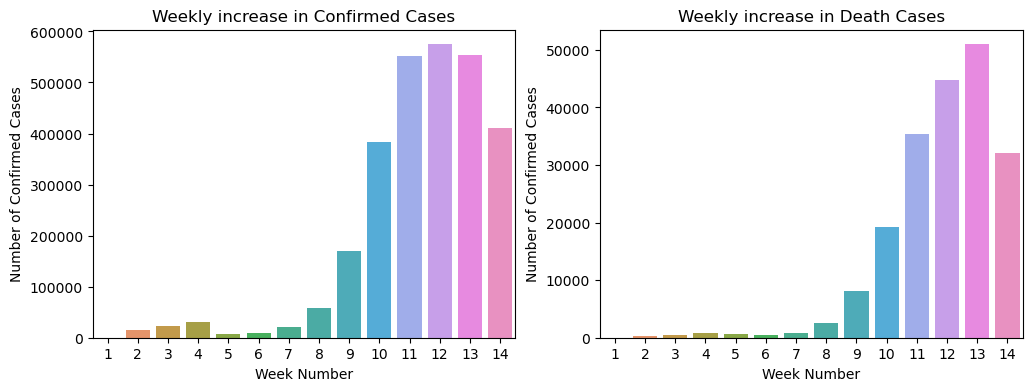

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel('Week Number')
ax2.set_xlabel('Week Number')
ax1.set_ylabel('Number of Confirmed Cases')
ax2.set_ylabel('Number of Confirmed Cases')
ax1.set_title('Weekly increase in Confirmed Cases')
ax2.set_title('Weekly increase in Death Cases')
plt.show()

Average increse in number of Confirmed cases everyday: 29900.0
Average increse in number of Recovered cases everyday: 8442.0
Average increse in number of Death cases everyday: 2097.0


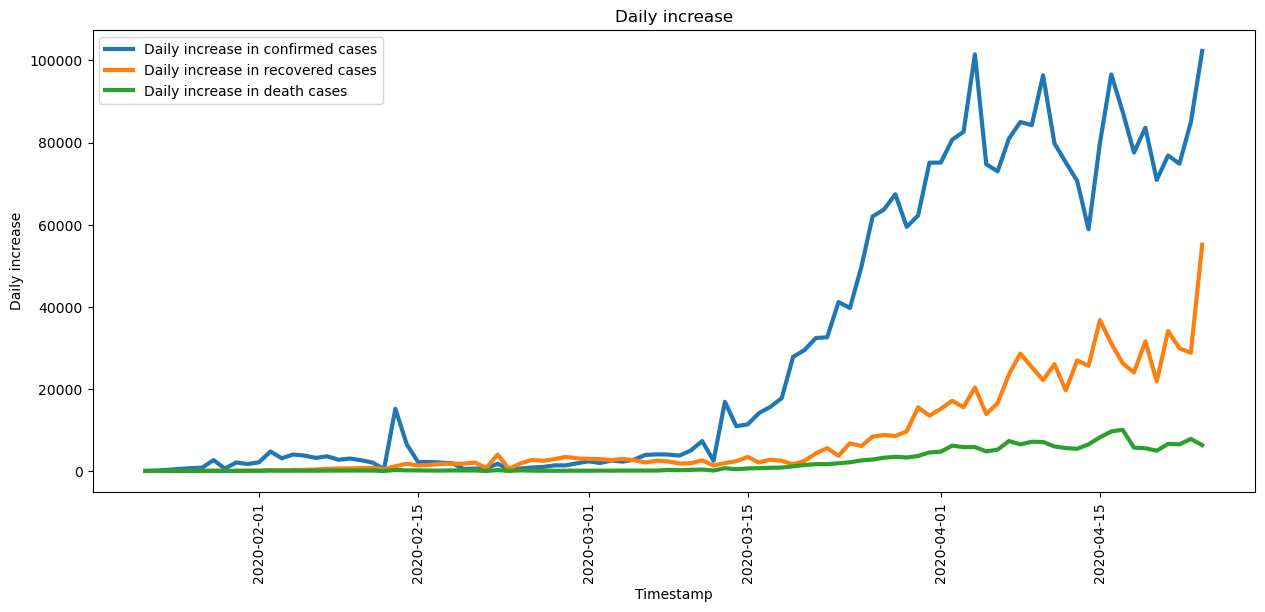

In [91]:
print('Average increse in number of Confirmed cases everyday:',np.round(datewise['Confirmed'].diff().fillna(0).mean()))
print('Average increse in number of Recovered cases everyday:',np.round(datewise['Recovered'].diff().fillna(0).mean()))
print('Average increse in number of Death cases everyday:',np.round(datewise['Deaths'].diff().fillna(0).mean()))
plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [92]:
countrywise= covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Recovered"])*100
countrywise["Recovered"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

Text(0.5, 1.0, 'Top 15 countries as per number of death cases')

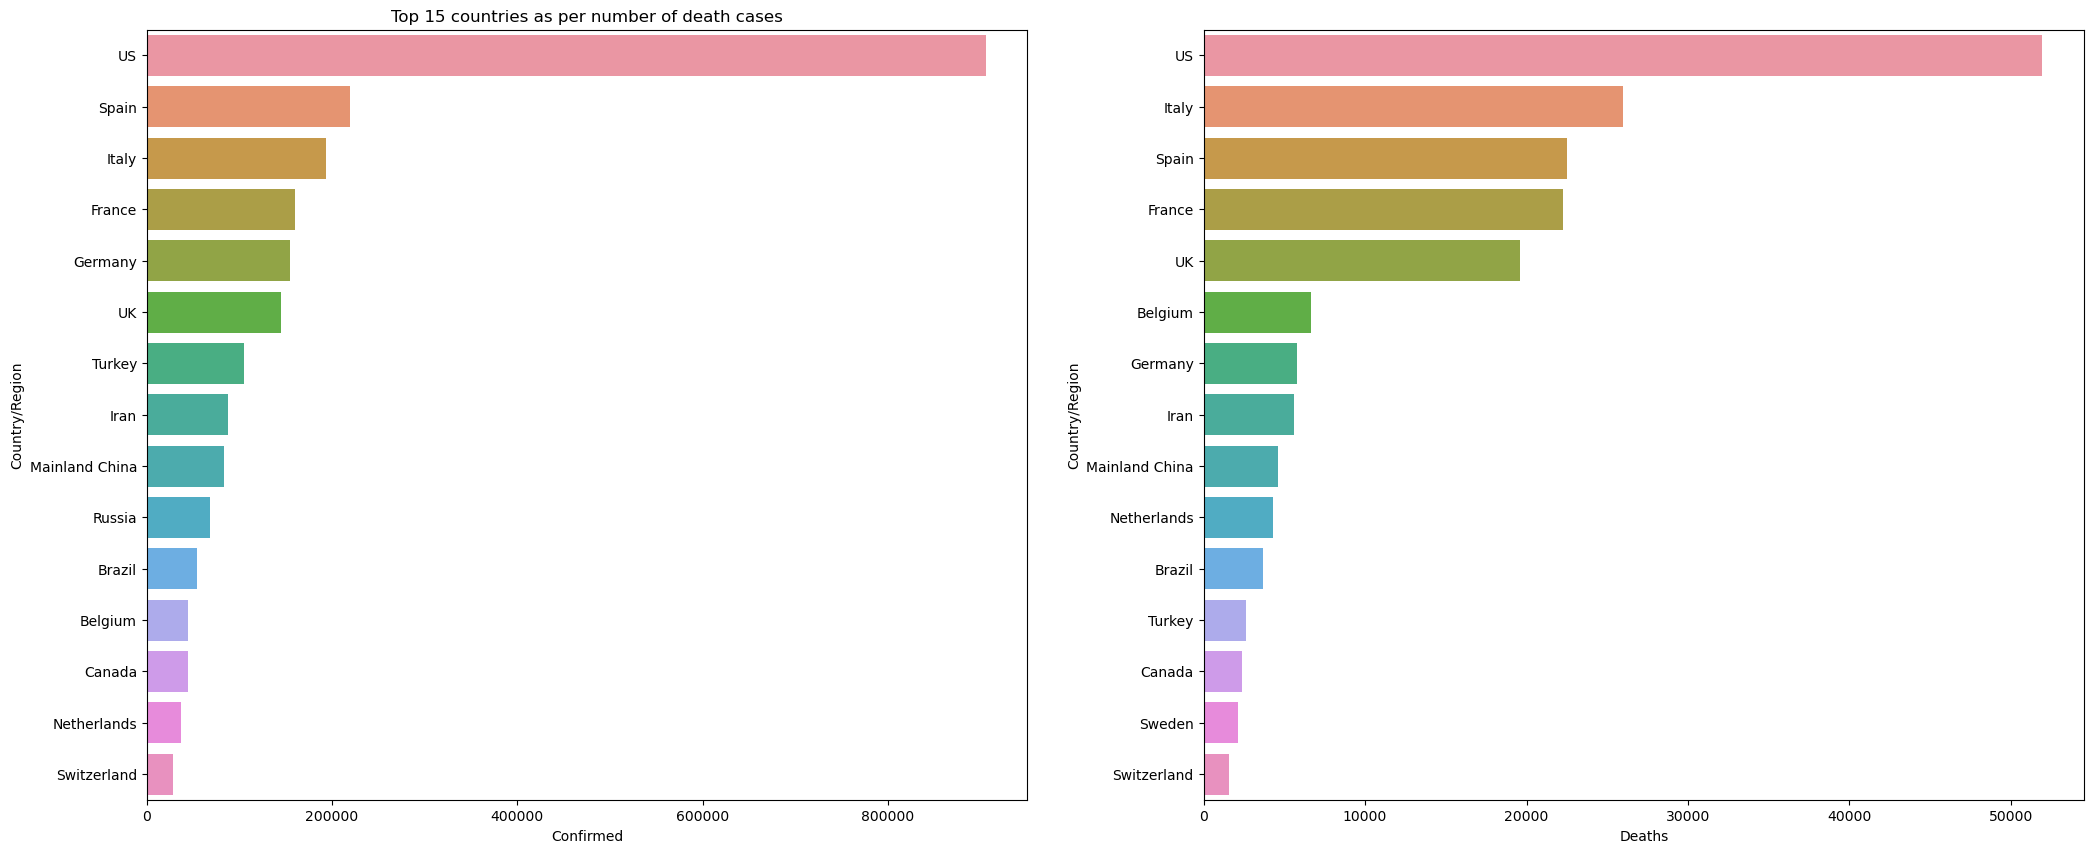

In [93]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_15confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per number of confirmed cases")
sns.barplot(x=top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax1.set_title("Top 15 countries as per number of death cases")

# India Analysis

In [95]:
india_data = covid[covid["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Active Cases",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed    24530.0
Recovered     5498.0
Deaths         780.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Active Cases 18252.0
Total Closed Cases 6278.0


# USA Analysis


In [96]:
us_data = covid[covid["Country/Region"]=="US"]
datewise_us = us_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_us.iloc[-1])
print("Total Active Cases",datewise_us["Confirmed"].iloc[-1]-datewise_us["Recovered"].iloc[-1]-datewise_us["Deaths"].iloc[-1])
print("Total Closed Cases",datewise_us["Recovered"].iloc[-1]+datewise_us["Deaths"].iloc[-1])

Confirmed    905333.0
Recovered     99079.0
Deaths        51949.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Active Cases 754305.0
Total Closed Cases 151028.0


/var/folders/mg/rcr7nks14gv8j_rmk8qrv37c0000gn/T/ipykernel_12462/526559355.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  datewise_india["WeekofYear"] = datewise_india.index.weekofyear


Text(0.5, 1.0, 'Weekly Progress of different types of cases')

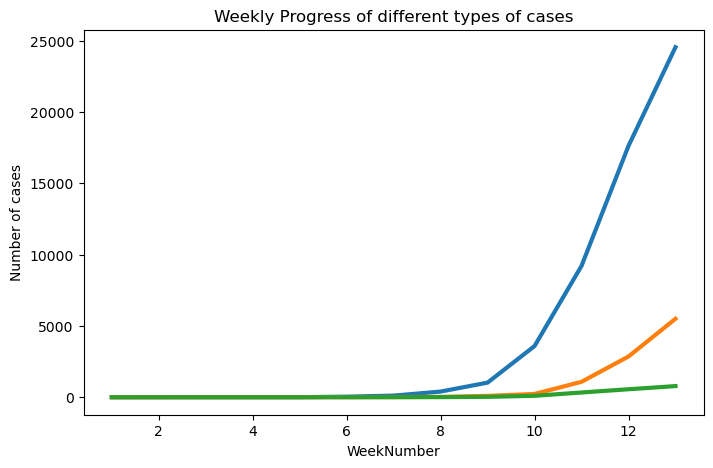

In [97]:
datewise_india["WeekofYear"] = datewise_india.index.weekofyear
week_num_india = []
india_weekwise_confirmed = []
india_weekwise_recovered = []
india_weekwise_deaths = []
w = 1
for i in list(datewise_india["WeekofYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3)
plt.plot(week_num_india,india_weekwise_recovered,linewidth =3)
plt.plot(week_num_india,india_weekwise_deaths,linewidth = 3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

In [98]:
max_ind = datewise_india["Confirmed"].max()
china_data = covid[covid["Country/Region"]=="Mainland China"]
Italy_data = covid[covid["Country/Region"]=="Italy"]
US_data = covid[covid["Country/Region"]=="US"]
spain_data = covid[covid["Country/Region"]=="Spain"]
datewise_china = china_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_US=US_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Spain=spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("It took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach",max_ind,"Confirmed Cases")
print("It took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach number of Confirmed Cases")
print("It took",datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in US to reach number of Confirmed Cases")
print("It took",datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)].shape[0],"days in Spain to reach number of Confirmed Cases")
print("It took",datewise_china[(datewise_china["Confirmed"]>0)&(datewise_china["Confirmed"]<=max_ind)].shape[0],"days in China to reach number of Confirmed Cases")

It took 86 days in India to reach 24530.0 Confirmed Cases
It took 44 days in Italy to reach number of Confirmed Cases
It took 59 days in US to reach number of Confirmed Cases
It took 49 days in Spain to reach number of Confirmed Cases
It took 14 days in China to reach number of Confirmed Cases


In [99]:
datewise['Days Since']=datewise.index-datewise.index[0]
datewise['Days Since']=datewise['Days Since'].dt.days

# Model Training


In [101]:
train_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml = datewise.iloc[:int(datewise.shape[0]*0.95):]
model_scores=[]

In [112]:
lr = make_pipeline(StandardScaler(), LinearRegression())
lr.fit(np.array(train_ml["Days Since"]).reshape(-1, 1), np.array(train_ml["Confirmed"]).reshape(-1, 1))
svm = SVR(C=1, degree=5, kernel='poly', epsilon=0.001)
svm.fit(np.array(train_ml["Days Since"]).reshape(-1, 1), np.array(train_ml["Confirmed"]).reshape(-1))

SVR(C=1, degree=5, epsilon=0.001, kernel='poly')

In [114]:
prediction_valid_lr = lr.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [116]:
new_date = []
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
  new_date.append(datewise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lr.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVR"])
model_predictions.head(5)

,Dates,LR,SVR
0,2020-04-25,1560529,3322586
1,2020-04-26,1582219,3500761
2,2020-04-27,1603909,3686599
3,2020-04-28,1625599,3880344
4,2020-04-29,1647289,4082245


In [117]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.85)]
valid=datewise.iloc[int(datewise.shape[0]*0.85):]

In [118]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))

/var/folders/mg/rcr7nks14gv8j_rmk8qrv37c0000gn/T/ipykernel_12462/4165006727.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
/Users/samyak_it_is/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [119]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
   holt_new_date.append(datewise.index[-1]+timedelta(days=i))
   holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holts Linear Model Prediction"]=holt_new_prediction
model_predictions.head()

,Dates,LR,SVR,Holts Linear Model Prediction
0,2020-04-25,1560529,3322586,2855246
1,2020-04-26,1582219,3500761,2933902
2,2020-04-27,1603909,3686599,3012558
3,2020-04-28,1625599,3880344,3091214
4,2020-04-29,1647289,4082245,3169870
